In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import math   # This will import math module

In [2]:
#write csv in spyder
dataset = pd.read_csv('tcri.csv')  

In [3]:
dataset.shape 

(14142, 5)

In [4]:
dataset.head()

,coid,mdate,tcri,scr,xcdt
0,1103,2014-12-01 00:00:00+00:00,6,400.0,NaN
1,1103,2015-12-01 00:00:00+00:00,6,432.0,NaN
2,1103,2016-12-01 00:00:00+00:00,6,371.0,NaN
3,1103,2017-12-01 00:00:00+00:00,6,330.0,NaN
4,1103,2018-12-01 00:00:00+00:00,6,331.0,NaN


In [5]:
dataset.describe()

,coid,scr
count,14142.000000,14126.000000
mean,4475.157969,403.702747
std,2195.149125,224.010612
min,1103.000000,-1465.000000
25%,2601.000000,310.000000
50%,4131.000000,424.000000
75%,6213.000000,544.000000
max,9962.000000,1025.000000


In [6]:
dataset.describe(include = 'all')

,coid,mdate,tcri,scr,xcdt
count,14142.000000,14142,14142,14126.000000,226
unique,NaN,11,7,NaN,5
top,NaN,2023-12-01 00:00:00+00:00,6,NaN,上市前
freq,NaN,1387,5091,NaN,112
mean,4475.157969,NaN,NaN,403.702747,NaN
std,2195.149125,NaN,NaN,224.010612,NaN
min,1103.000000,NaN,NaN,-1465.000000,NaN
25%,2601.000000,NaN,NaN,310.000000,NaN
50%,4131.000000,NaN,NaN,424.000000,NaN
75%,6213.000000,NaN,NaN,544.000000,NaN


<Axes: title={'center': 'Freq dist of X2'}, xlabel='tcri'>

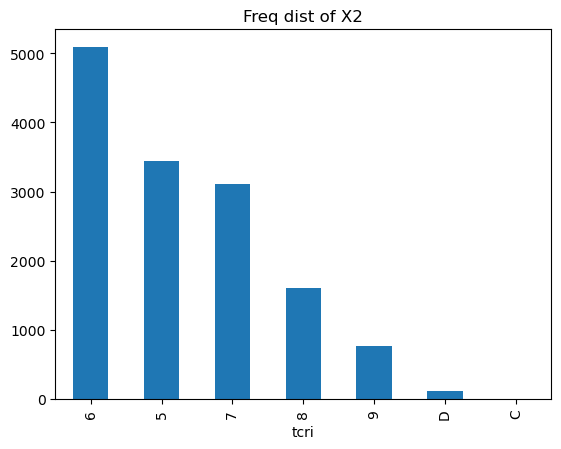

In [7]:
dataset['tcri'].value_counts().plot.bar(title='Freq dist of X2')

<Axes: xlabel='scr', ylabel='Count'>

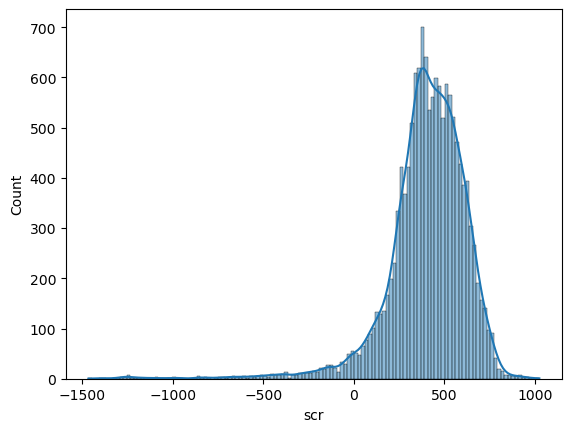

In [8]:
sns.histplot(data=dataset['scr'], kde=True)

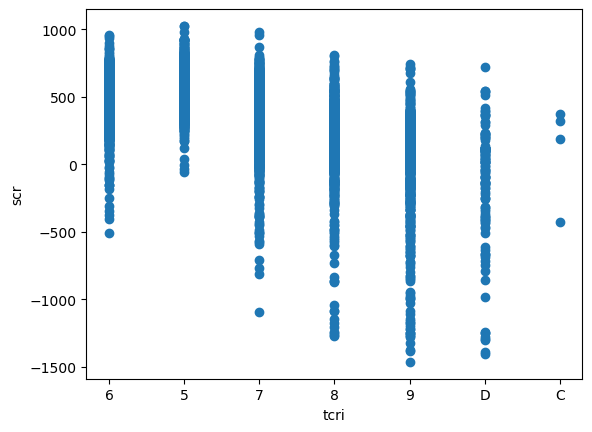

In [9]:
x = dataset['tcri']
y = dataset['scr']
plt.scatter(x, y)       
plt.xlabel('tcri')
plt.ylabel('scr')
plt.show()

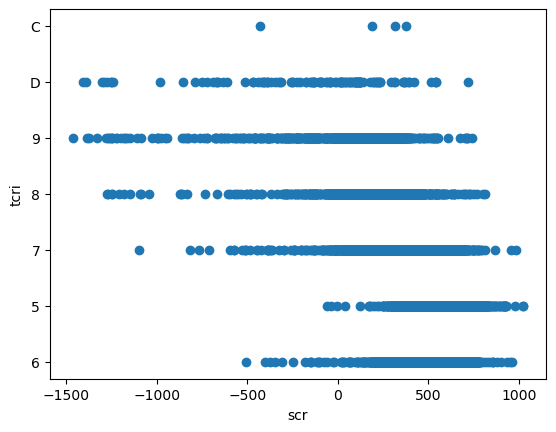

In [10]:
x = dataset['scr']
y = dataset['tcri']
plt.scatter(x, y)       
plt.xlabel('scr')
plt.ylabel('tcri')
plt.show()

<Axes: xlabel='tcri', ylabel='Count'>

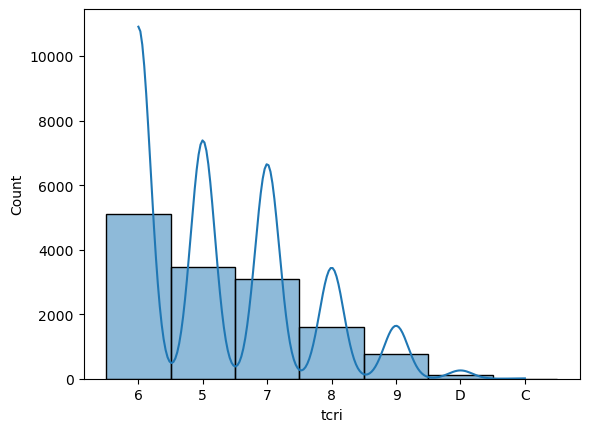

In [11]:
sns.histplot(data=dataset['tcri'], kde=True)

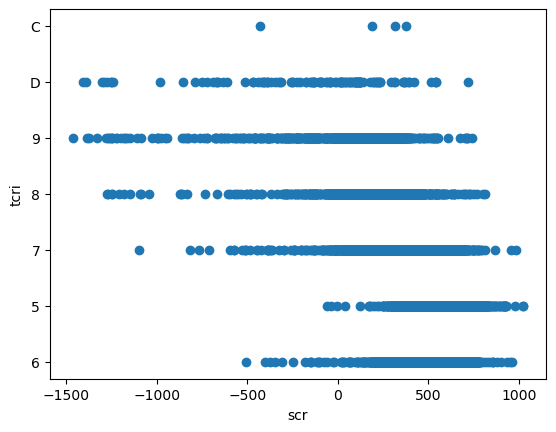

In [16]:
x = dataset['scr']
y = dataset['tcri']
plt.scatter(x, y)       
plt.xlabel('scr')
plt.ylabel('tcri')
plt.show()

In [19]:
print(dataset.nunique())

coid     1491
mdate      11
tcri        7
scr      1222
xcdt        5
dtype: int64


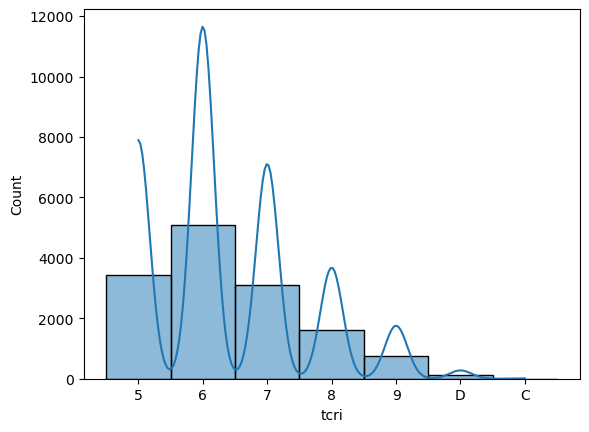

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset['tcri'] = pd.Categorical(dataset['tcri'], 
                                categories=['5', '6', '7', '8', '9', 'D', 'C'],
                                ordered=True)

sns.histplot(data=dataset['tcri'], kde=True)
plt.xlabel('tcri')
plt.ylabel('Count')
plt.show()

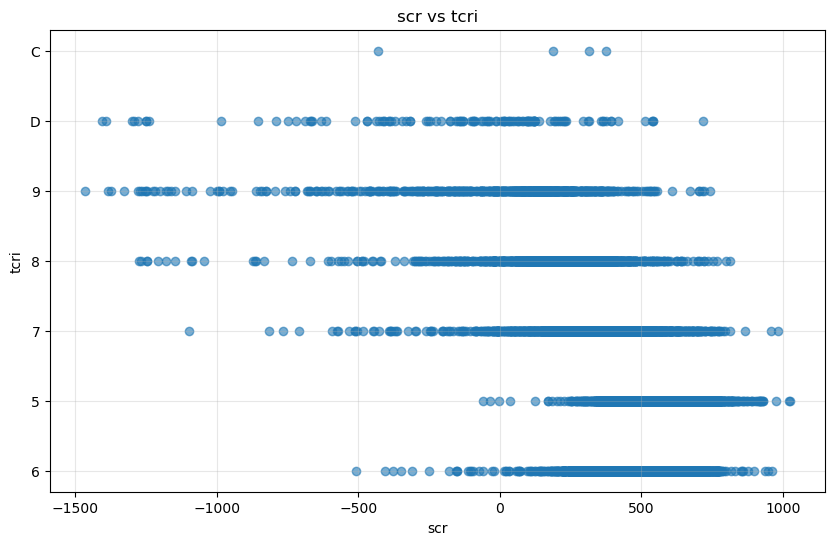

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

dataset['tcri'] = dataset['tcri'].astype(str)

dataset['tcri'] = pd.Categorical(dataset['tcri'], 
                                categories=['5', '6', '7', '8', '9', 'D', 'C'], 
                                ordered=True)

x = dataset['scr']
y = dataset['tcri']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6)
plt.xlabel('scr')
plt.ylabel('tcri')
plt.title('scr vs tcri')
plt.grid(True, alpha=0.3)
plt.show()

可用的數值特徵: ['coid', 'scr']


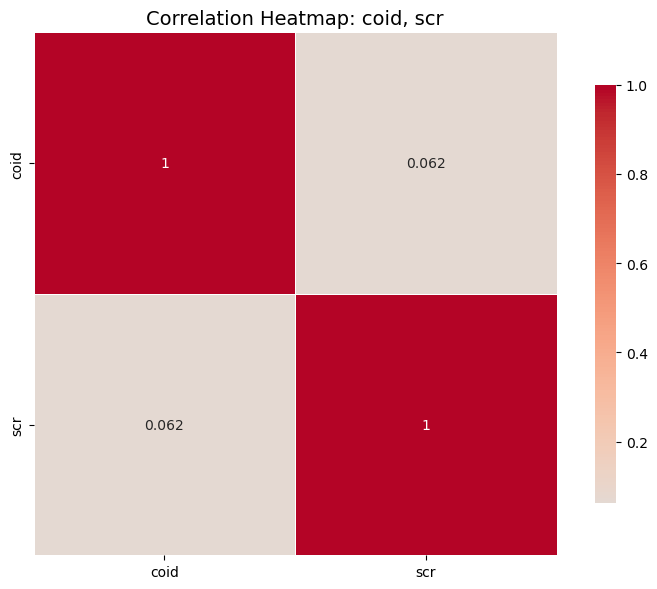

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 只選擇數值型特徵
numeric_columns = dataset.select_dtypes(include=['number']).columns

# 檢查我們需要的特徵哪些是數值的
available_numeric = [col for col in ['coid', 'mdate', 'tcri', 'scr'] if col in numeric_columns]

print(f"可用的數值特徵: {available_numeric}")

if available_numeric:
    plt.figure(figsize=(8, 6))
    sns.heatmap(dataset[available_numeric].corr(), 
               annot=True,
               cmap='coolwarm',
               center=0,
               square=True,
               linewidths=0.5,
               cbar_kws={"shrink": 0.8})
    
    plt.title(f'Correlation Heatmap: {", ".join(available_numeric)}', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("沒有可用的數值特徵")

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14142 entries, 0 to 14141
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   coid      14142 non-null  int64   
 1   mdate     14142 non-null  object  
 2   tcri      14142 non-null  category
 3   scr       14126 non-null  float64 
 4   xcdt      226 non-null    object  
 5   tcri_str  14142 non-null  object  
 6   tcri_cat  14142 non-null  category
dtypes: category(2), float64(1), int64(1), object(3)
memory usage: 580.9+ KB


In [54]:
dataset.isnull().sum()

coid            0
mdate           0
tcri            0
scr            16
xcdt        13916
tcri_str        0
tcri_cat        0
dtype: int64